# Use Clustering Techniques for the any customer dataset using machine learning

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\nimra\Downloads\archive (1)\Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.head()#starting 5 values

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.tail()#ending 5 values

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
df.info()#concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()#returns description of the data in the DataFrame

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()#no null values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
# Assuming you have selected relevant features in the 'X' variable
X = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [17]:
df.duplicated().sum()#no duplicates present

0

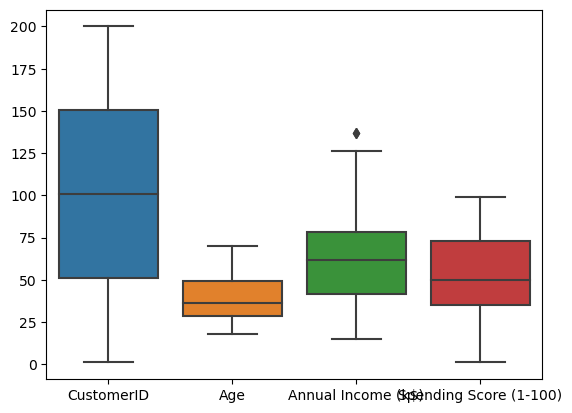

In [18]:
sns.boxplot(data = df)#plotting boxplot for checking outliers
plt.show()

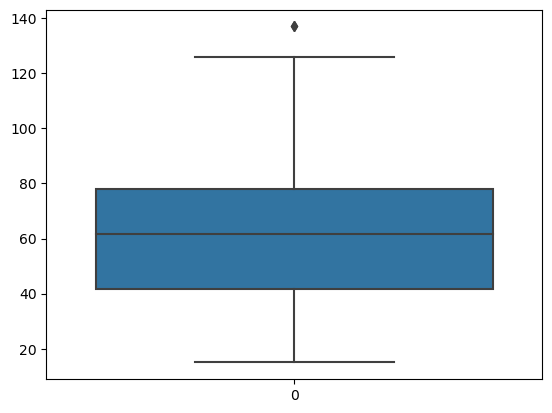

In [19]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

# k means clustering

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
num_clusters = 3  # You can choose the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df['Cluster'] = clusters

In [23]:
df['Cluster'] 

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    2
197    1
198    1
199    1
Name: Cluster, Length: 200, dtype: int32

In [24]:
cluster_means = df.groupby('Cluster').mean()

C:\Users\nimra\AppData\Local\Temp\ipykernel_16616\1102041921.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


In [25]:
cluster_means 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,60.573529,25.838235,42.750000,53.647059
1,161.951220,32.853659,87.341463,79.975610
2,102.648352,51.274725,61.802198,34.208791


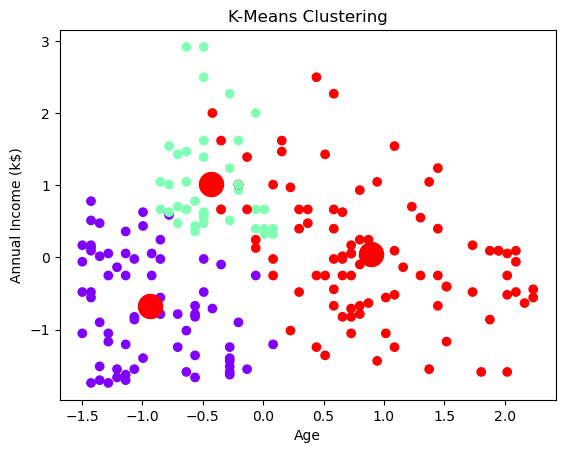

In [26]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
hee we have three clusters 


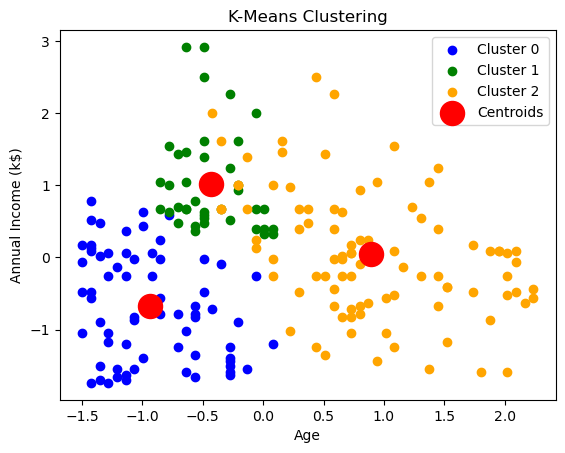

In [28]:
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the customer data with the 'Cluster' column added from the previous code
# And 'data' has columns 'Age' and 'Annual Income (k$)'

# Create a scatter plot for clusters labeled as 0, 1, and 2 with different colors
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], c='green', label='Cluster 1')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], c='orange', label='Cluster 2')

# Plot the cluster centroids in red
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


cluster CustomerID	Age	Annual Income (k$)	Spending Score (1-100)
0   	60.573529	25.838235	42.750000	53.647059
1   	161.951220	32.853659	87.341463	79.975610
2   	102.648352	51.274725	61.802198	34.208791

we can see that cluster 0 the avg age is 25(merely kids to grown adults) and has low income and moderate spending score
we can see that cluster 1 the avg age is 32 (from grown to a middle aged people) and has high income and high spending score
we can see that cluster 2 the avg age is 51(grown to almost and equally old aged people) and has modearte income and has low spending score

# data visualization

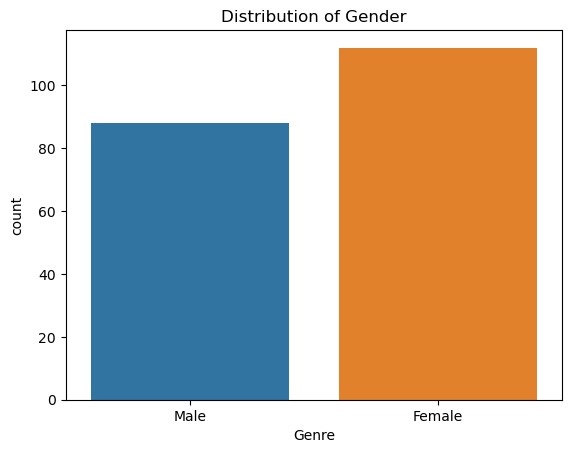

In [30]:
sns.countplot(x='Genre', data=df);
plt.title('Distribution of Gender');

Female are More than Male
This also speaks that most of there customers are Female

C:\Users\nimra\AppData\Local\Temp\ipykernel_16616\2246836153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"] )


<Axes: xlabel='Age', ylabel='Density'>

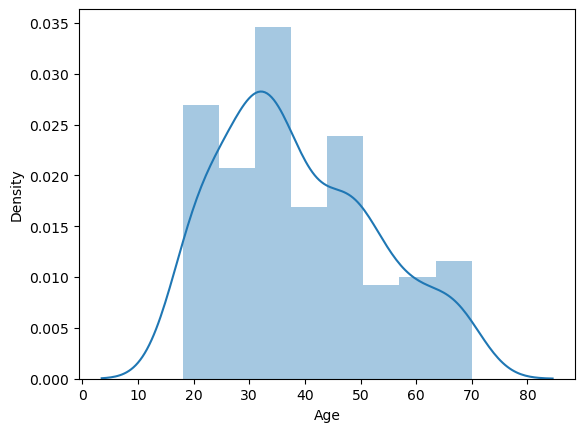

In [32]:
sns.distplot(df["Age"] )

Most of the people ar 25-37

C:\Users\nimra\AppData\Local\Temp\ipykernel_16616\3961397109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"] )


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

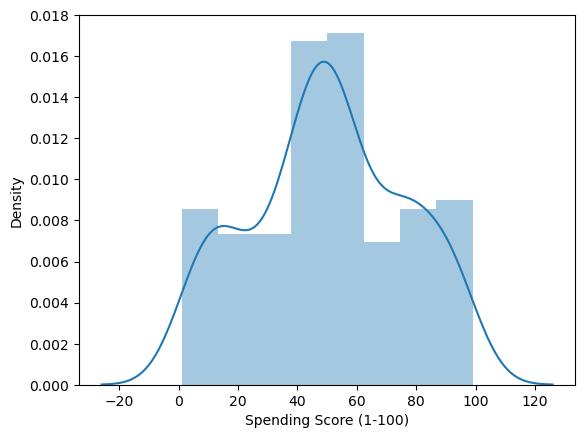

In [34]:
sns.distplot(df["Spending Score (1-100)"] )

Most of the people fall under Annual Income 50k-80k

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

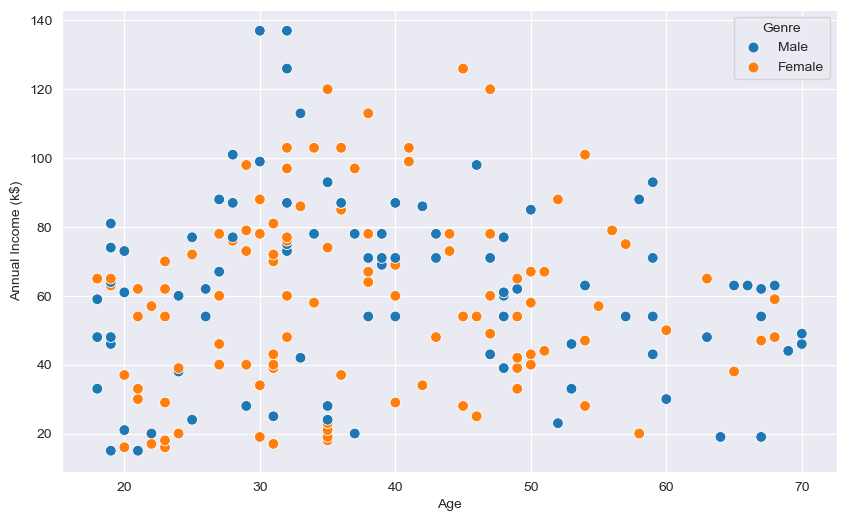

In [35]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Genre", s=60)

Annual Income is less As Age Increases

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

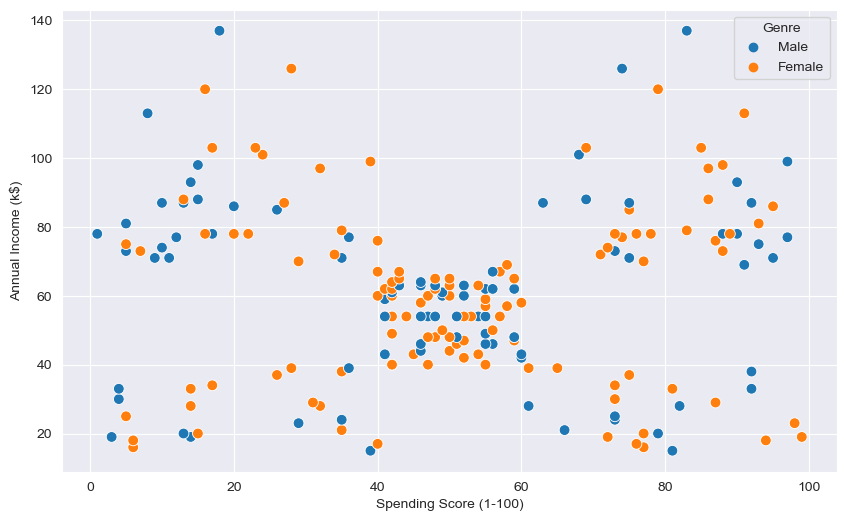

In [36]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Genre", s=60)

Peoples whos Annual Income 40-60 has Spending Score 40-60

<Figure size 1000x900 with 0 Axes>

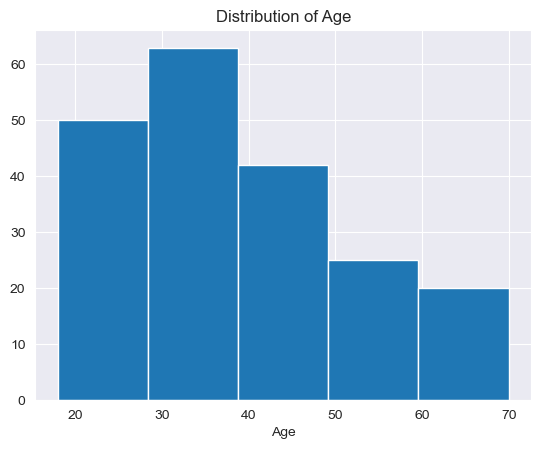

In [37]:
# Histogram of ages
plt.figure(figsize=(10,9))
df.hist('Age', bins=5);
plt.title('Distribution of Age');
plt.xlabel('Age');

<Figure size 1000x900 with 0 Axes>

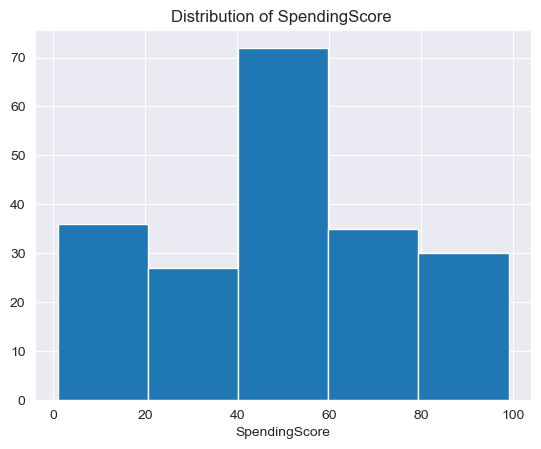

In [38]:
# Histogram of ages
plt.figure(figsize=(10,9))
df.hist('Spending Score (1-100)', bins=5);
plt.title('Distribution of SpendingScore ');
plt.xlabel('SpendingScore');